<a href="https://colab.research.google.com/github/belanasaikiran/Team-6-Big-Data-Project/blob/main/Car_Model_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Model Detection:

### Team 6:

## Todo:
- [x] Import the DataSet.
- [x] Preprocessing
- [ ] Feature Selection
- [ ] Model Selection
- [ ] Training the Model

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip gdrive/MyDrive/DataSet/DataSet.zip > /dev/null # output to null

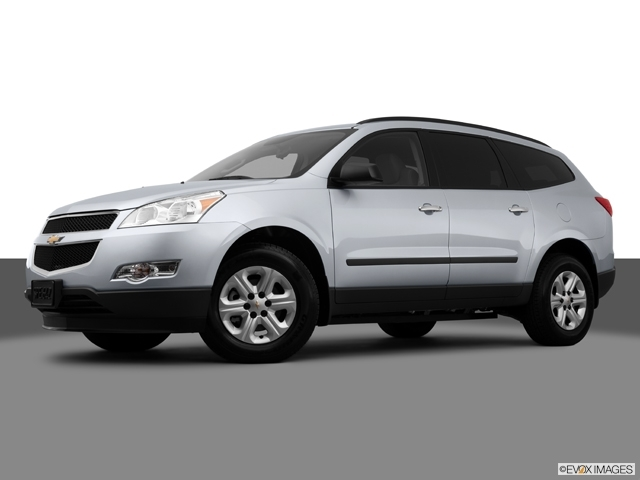

In [58]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('DataSet/images/cars_train/00010.jpg')
img

In [59]:
print(img.width, img.height)


640 480


In [52]:
import numpy as np
import pandas as pd

In [5]:
metadata = pd.read_csv("DataSet/data/meta.csv")

In [18]:
metadata.head()

,Unnamed: 0,class_name
0,1,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012


In [7]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  196 non-null    int64 
 1   class_name  196 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [60]:
metadata.columns

Index(['Unnamed: 0', 'class_name'], dtype='object')

## Load the Train & Test Datasets

In [9]:
train_data = pd.read_csv("DataSet/data/train.csv")

train_data.head()

,Unnamed: 0,x1,y1,x2,y2,class,fname
0,0,39,116,569,375,14,00001.jpg
1,1,36,116,868,587,3,00002.jpg
2,2,85,109,601,381,91,00003.jpg
3,3,621,393,1484,1096,134,00004.jpg
4,4,14,36,133,99,106,00005.jpg


In [10]:
train_data.describe()

,Unnamed: 0,x1,y1,x2,y2,class
count,12948.000000,12948.000000,12948.000000,12948.000000,12948.000000,12948.000000
mean,3451.892339,64.701189,108.592833,638.598625,416.670683,99.008573
std,2200.262018,81.774972,106.195279,409.613163,272.818630,56.540538
min,0.000000,1.000000,1.000000,76.000000,41.000000,1.000000
25%,1618.000000,19.000000,42.000000,394.000000,250.000000,50.000000
50%,3236.500000,39.000000,80.000000,572.000000,361.000000,99.000000
75%,4906.250000,78.000000,138.000000,742.250000,475.000000,148.000000
max,8143.000000,1648.000000,1651.000000,5205.000000,3389.000000,196.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12948 entries, 0 to 12947
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12948 non-null  int64 
 1   x1          12948 non-null  int64 
 2   y1          12948 non-null  int64 
 3   x2          12948 non-null  int64 
 4   y2          12948 non-null  int64 
 5   class       12948 non-null  int64 
 6   fname       12948 non-null  object
dtypes: int64(6), object(1)
memory usage: 708.2+ KB


In [13]:
train_data.shape

(12948, 7)

In [14]:
train_data.columns

Index(['Unnamed: 0', 'x1', 'y1', 'x2', 'y2', 'class', 'fname'], dtype='object')

In [15]:
test_data = pd.read_csv("DataSet/data/test.csv") #load test data
test_data.head()

,Unnamed: 0,x1,y1,x2,y2,class,fname
0,0,30,52,246,147,181,00001.jpg
1,1,100,19,576,203,103,00002.jpg
2,2,51,105,968,659,145,00003.jpg
3,3,67,84,581,407,187,00004.jpg
4,4,140,151,593,339,185,00005.jpg


# Split Data into Training and Validation Set

In [19]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [21]:
X_train = train_data.drop(columns=["class"]) #Features
y_train = train_data["class"] # Target variable which in our case is class

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #training set 80% and validation set 20%

In [23]:
X_train.shape

(10358, 6)

In [24]:
X_val.shape

(2590, 6)

In [25]:
y_val.shape

(2590,)

In [26]:
X_train.head()

,Unnamed: 0,x1,y1,x2,y2,fname
6821,6821,22,186,975,652,06822.jpg
2498,2498,49,163,733,438,02499.jpg
1851,1851,27,21,626,433,01852.jpg
8128,8128,529,463,1306,808,08129.jpg
4533,4533,27,73,555,330,04534.jpg


In [31]:
X_train_array = X_train.to_numpy()

In [32]:
X_train_reshaped = X_train_array.reshape(10358, 28*28)

ValueError: cannot reshape array of size 62148 into shape (10358,784)

#Prepare the Data for Machine Learning Algorithms

#Data Cleaning

In [33]:
sample_incomplete_rows = train_data[train_data.isnull().any(axis=1)].head() #maybe we don't have any missing data
pd.set_option('display.max_columns', None)
sample_incomplete_rows

,Unnamed: 0,x1,y1,x2,y2,class,fname


## Calculate the width and height of bounding boxes

In [34]:
# Calculate width of bounding boxes
train_data['bbox_width'] = train_data['x2'] - train_data['x1']

# Calculate height of bounding boxes
train_data['bbox_height'] = train_data['y2'] - train_data['y1']

# Print the first few rows to verify the new features
print(train_data[['bbox_width', 'bbox_height']].head())

   bbox_width  bbox_height
0         530          259
1         832          471
2         516          272
3         863          703
4         119           63


In [35]:
train_data.head()

,Unnamed: 0,x1,y1,x2,y2,class,fname,bbox_width,bbox_height
0,0,39,116,569,375,14,00001.jpg,530,259
1,1,36,116,868,587,3,00002.jpg,832,471
2,2,85,109,601,381,91,00003.jpg,516,272
3,3,621,393,1484,1096,134,00004.jpg,863,703
4,4,14,36,133,99,106,00005.jpg,119,63


## Calculate summary statistics for numerical features to determine should we apply normalization and Standardization

In [36]:
# Calculate summary statistics for numerical features
summary_statistics = train_data.describe()

# Print summary statistics to check the scale of features
print(summary_statistics)

         Unnamed: 0            x1            y1            x2            y2  \
count  12948.000000  12948.000000  12948.000000  12948.000000  12948.000000   
mean    3451.892339     64.701189    108.592833    638.598625    416.670683   
std     2200.262018     81.774972    106.195279    409.613163    272.818630   
min        0.000000      1.000000      1.000000     76.000000     41.000000   
25%     1618.000000     19.000000     42.000000    394.000000    250.000000   
50%     3236.500000     39.000000     80.000000    572.000000    361.000000   
75%     4906.250000     78.000000    138.000000    742.250000    475.000000   
max     8143.000000   1648.000000   1651.000000   5205.000000   3389.000000   

              class    bbox_width   bbox_height  
count  12948.000000  12948.000000  12948.000000  
mean      99.008573    573.897436    308.077850  
std       56.540538    374.261681    212.308214  
min        1.000000     71.000000     23.000000  
25%       50.000000    343.000000    1

## Normalization and Standardization

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the numerical features to be normalized
numerical_features = ['x1', 'y1', 'x2', 'y2', 'class', 'bbox_width', 'bbox_height']

# Apply normalization to the numerical features
train_data_normalized = train_data.copy()  # Create a copy of the original DataFrame
train_data_normalized[numerical_features] = scaler.fit_transform(train_data_normalized[numerical_features])

train_data_normalized.head()

,Unnamed: 0,x1,y1,x2,y2,class,fname,bbox_width,bbox_height
0,0,0.023072,0.069697,0.096120,0.099761,0.066667,00001.jpg,0.102593,0.082173
1,1,0.021251,0.069697,0.154416,0.163082,0.010256,00002.jpg,0.170094,0.155989
2,2,0.051002,0.065455,0.102359,0.101553,0.461538,00003.jpg,0.099464,0.086699
3,3,0.376442,0.237576,0.274517,0.315114,0.682051,00004.jpg,0.177023,0.236769
4,4,0.007893,0.021212,0.011113,0.017324,0.538462,00005.jpg,0.010729,0.013928


In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical features
train_data_standardized = train_data.copy()  # Create a copy of the original DataFrame
train_data_standardized[numerical_features] = scaler.fit_transform(train_data_standardized[numerical_features])

train_data_standardized.head()

,Unnamed: 0,x1,y1,x2,y2,class,fname,bbox_width,bbox_height
0,0,-0.314304,0.069753,-0.169920,-0.152747,-1.503556,00001.jpg,-0.117295,-0.231172
1,1,-0.350991,0.069753,0.560066,0.624356,-1.698114,00002.jpg,0.689658,0.767415
2,2,0.248237,0.003834,-0.091794,-0.130754,-0.141648,00003.jpg,-0.154704,-0.169938
3,3,6.803063,2.678256,2.063982,2.490136,0.618897,00004.jpg,0.772491,1.860208
4,4,-0.620033,-0.683605,-1.234380,-1.164447,0.123658,00005.jpg,-1.215500,-1.154394


## Handling text and Categorial Attributes

In [39]:
car_cat = train_data["fname"]
car_cat.head()

0    00001.jpg
1    00002.jpg
2    00003.jpg
3    00004.jpg
4    00005.jpg
Name: fname, dtype: object

In [41]:
from sklearn.preprocessing import OneHotEncoder

car_cat_reshaped = car_cat.values.reshape(-1, 1)
cat_encoder = OneHotEncoder()

car_cat_1hot = cat_encoder.fit_transform(car_cat_reshaped)

In [42]:
car_cat_1hot

<12948x12948 sparse matrix of type '<class 'numpy.float64'>'
	with 12948 stored elements in Compressed Sparse Row format>

In [44]:
car_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [46]:
car_cat_1hot.toarray().shape

(12948, 12948)

In [47]:
cat_encoder.categories_

[array(['00001.jpg', '00002.jpg', '00003.jpg', ..., '12947.jpg',
        '12948.jpg', '9999.jpg'], dtype=object)]